## 作业内容
基本要求：

●使用sklearn实现SVR

●数据要求：与神经网络相同

提高练习：

●实现基本的坐标下降算法（建议从线性回归问题开始）

●使用scipy.optimize训练SVR，并对比sklearn中的结果（相同条件下模型的差别）【必修】


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df1=pd.read_excel(r"C:\Users\lenovo\Downloads\Data1-train.xlsx",header=0)
df1.head()

,S_L,S_W,P_L,P_W,response
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X=df1[['S_L', 'S_W', 'P_L', 'P_W']].values.astype(float).copy()
y=df1['response'].values.astype(float).copy().reshape(-1,1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

SVR()

## 代码封装

### 基本要求

In [4]:
def SVR_rogression(X_train,y_train):
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_sklearn = ((y_test - y_pred) ** 2).mean()
    print("采用sklearn的均方误差:", mse_sklearn)
    return model, y_test, y_pred


In [5]:
def catagories(model,n,X,y):
    print("第%d个的预测值为:%d"%(n,0 if model.predict(X[n,:].reshape(1, -1))<0.5 else 1 ))
    print("第%d个的真实值为:%d"%(n,y[n].item()))


def plot_predictions(y_test, y_pred):
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值', alpha=0.5)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='预测值', alpha=0.5)
    plt.title('真实值与预测值比较')
    plt.xlabel('样本索引')
    plt.ylabel('值')
    plt.legend()
    plt.grid()
    plt.show()

def plot_predictions_compare(y_test, y1,y2):
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值', alpha=0.5)
    plt.scatter(range(len(y1)), y1, color='red', label='sklearn_预测值', alpha=0.5)
    plt.scatter(range(len(y2)), y2, color='green', label='scipy_预测值', alpha=0.5)
    plt.title('真实值与预测值比较')
    plt.xlabel('样本索引')
    plt.ylabel('值')
    plt.legend()
    plt.grid()
    plt.show()

### 提高练习

In [6]:
#使用scipy.optimize训练SVR，并对比sklearn中的结果（相同条件下模型的差别）
from scipy.optimize import minimize
def svr_loss(params, X, y, C=1.0, epsilon=0.1):
    w = params[:-1]
    b = params[-1]
    residual = np.maximum(0, np.abs(X @ w + b - y) - epsilon)
    loss = 0.5 * np.sum(w ** 2) + C * np.sum(residual)
    return loss



## 运行结果

### 基本要求

采用sklearn的均方误差: 0.4903703416280882


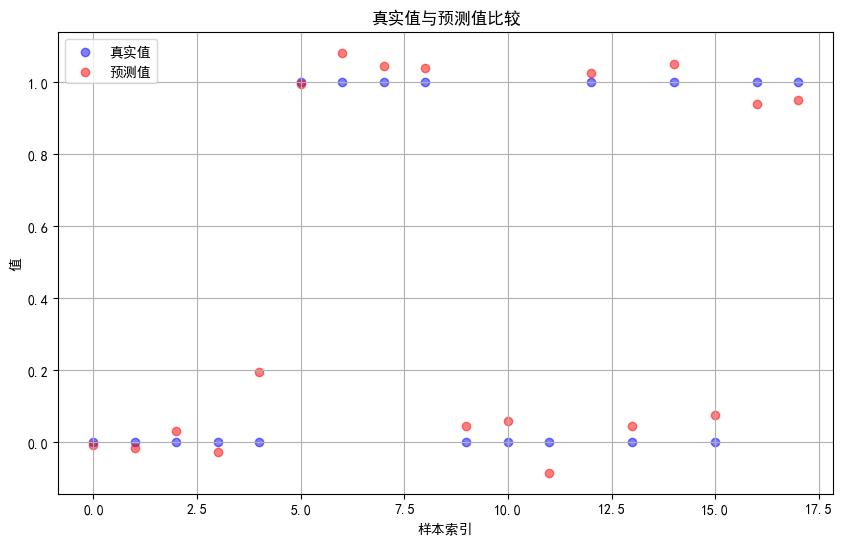

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)
y_train = y_train.ravel()
model,y_test, y_pred_sklearn = SVR_rogression(X_train,y_train)
#catagories(model,1,X,y)
plot_predictions(y_test, y_pred_sklearn)

### 提高练习

In [8]:
print("两种方法对比:")
model,y_test, y_pred = SVR_rogression(X_train,y_train)
initial_params = np.zeros(X_train.shape[1] + 1)  
result = minimize(svr_loss, initial_params, args=(X_train, y_train), method='L-BFGS-B')
w_opt = result.x[:-1]
b_opt = result.x[-1]
y_pred_scipy = np.dot(X_test , w_opt) + b_opt
mse_scipy=((y_test-y_pred_scipy)**2).mean()
print("采用scipy的均方误差:", mse_scipy)

两种方法对比:
采用sklearn的均方误差: 0.4903703416280882
采用scipy的均方误差: 0.5089147699312995


d:\tools\miniforge\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


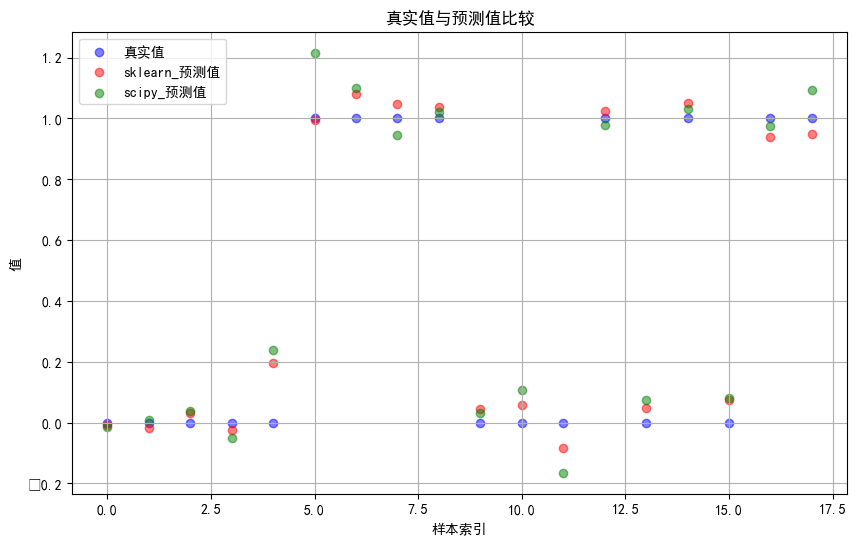

In [9]:
plot_predictions_compare(y_test, y_pred_sklearn,y_pred_scipy)


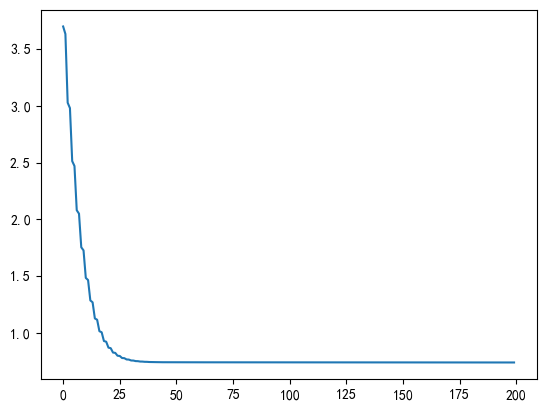

In [10]:
#手动实现坐标下降

import numpy as np
A=df1[['S_L', 'S_W', 'P_L', 'P_W']].values.astype(float).copy()[:70,:]#前70个为训练集
N=A.shape[1]
x=np.zeros(N).astype(float)
b=df1['response'].values.astype(float).copy()[:70]


error =A@x-b.copy()
epsilon = 1e-6
max_iter=200
error_list=[]
dlist=[]
mlist=[]
for j in range(max_iter):
    k=j%N
    delta_x=(A[:,k].T@error/(A[:,k].T@A[:,k])).item()
    x[k]=x[k]-delta_x
    error =error-A[:,k]*delta_x

    error_list.append(np.linalg.norm(error))
    if abs(error).mean()<epsilon:
        break
plt.plot(error_list)

In [12]:
#测试结果
def test_result(n):
    result=df1.iloc[n,:-1].values@x
    print("第%d样本的真实标签是%d"%(n,y[n].item()))
    print("第%d样本的预测标签是%d"%(n, 0 if result<0.5 else 1))
    print("_________________________________")
for i in np.random.randint(70,90,10):
    test_result(i)

第86样本的真实标签是1
第86样本的预测标签是1
_________________________________
第75样本的真实标签是1
第75样本的预测标签是1
_________________________________
第81样本的真实标签是1
第81样本的预测标签是1
_________________________________
第83样本的真实标签是1
第83样本的预测标签是1
_________________________________
第78样本的真实标签是1
第78样本的预测标签是1
_________________________________
第81样本的真实标签是1
第81样本的预测标签是1
_________________________________
第88样本的真实标签是1
第88样本的预测标签是1
_________________________________
第76样本的真实标签是1
第76样本的预测标签是1
_________________________________
第81样本的真实标签是1
第81样本的预测标签是1
_________________________________
第83样本的真实标签是1
第83样本的预测标签是1
_________________________________


## 总结

使用支持向量回归（SVR）对数据进行建模，并比较了使用 scikit-learn 和 scipy 库实现的SVR模型的效果。首先，我们从Excel文件中读取数据，并将特征和目标变量分离。通过 train_test_split 函数将数据集划分为训练集和测试集，采用RBF核的SVR模型进行训练。

我们定义了一个函数 SVR_rogression 来训练模型并计算均方误差（MSE），然后通过 catagories 函数输出特定样本的预测值和真实值。为了可视化模型的表现，使用 matplotlib 绘制了真实值与预测值的散点图，直观展示了模型的拟合效果。

此外，我们使用 scipy.optimize.minimize 实现了SVR的自定义训练过程，并与 scikit-learn 的结果进行了对比。发现在处理鸢尾蝶数据集，采用sklearn产生的均方误差和最小，原因是sklearn的优化算法是SMO，而scipy里面没有SMO，于是采用的BFGS算法。而SMO本身是一种专门用于 SVM 的优化方法，用来解决二次规划问题。因此采用sklearn自带的SVR库既方便又准确。
最后，手动实现了坐标下降法来优化SVR模型，进一步加深了对算法的理解。

通过随机选取样本进行测试，验证了模型的预测能力。整体而言，SVR在处理回归问题时表现出色，但不同实现方式的均方误差略有差异，反映了算法细节对结果的影响。这一过程不仅提升了对SVR的理解，也锻炼了数据处理和可视化的能力。